# Fit Using Inequality Constraint

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Minimizer, Parameters, report_fit
from lmfit.lineshapes import gaussian, lorentzian

In [10]:
def residual(pars, x, data):
    model = (gaussian( x, pars['amp_g'], pars['cen_g'], pars['wid_g']) +
            lorentzian(x, pars['amp_l'], pars['cen_l'], pars['wid_l']))
    return model - data

## Note

Lorentzian function -- often used to describe spectral line shape. For a given peak and width, it is similiar to Gaussian near the peak, but tails drop more quickly. 
https://xpslibrary.com/gaussian-lorentzian-models/

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d1/Gauss_and_Lorentz_lineshapes.png">


the function is given as 

$$ L = \frac{1}{1 + x^2}$$, where 
$$ x = \frac{p^0 - p}{w/2}$$


### Simulated data

In [4]:
x = np.linspace(0, 20, 601)

data = (gaussian(x, 21, 6.1, 1.2) + lorentzian(x, 10, 9.6, 1.3)) + np.random.normal(scale=0.1, size=x.size)

### fitting parameters and constraints

**value** : initial guess  
**vary** : Allow varying during the fit. Defaults to True

In [8]:
pfit = Parameters()
pfit.add(name='amp_g', value=10)
pfit.add(name='amp_l', value=10)
pfit.add(name='cen_g', value=5)
pfit.add(name='peak_split', value=2.5, min=0, max=5, vary=True)
pfit.add(name='cen_l', expr='peak_split + cen_g')
pfit.add(name='wid_g', value=1)
pfit.add(name='wid_l', expr='wid_g')

In [11]:
mini = Minimizer(residual, pfit, fcn_args=(x, data))
out = mini.leastsq()
best_fit = data + out.residual

In [12]:
report_fit(out.params)

[[Variables]]
    amp_g:       21.2958153 +/- 0.05187276 (0.24%) (init = 10)
    amp_l:       9.45347817 +/- 0.05492600 (0.58%) (init = 10)
    cen_g:       6.11154408 +/- 0.00338047 (0.06%) (init = 5)
    peak_split:  3.52478502 +/- 0.01016934 (0.29%) (init = 2.5)
    cen_l:       9.63632910 +/- 0.01079996 (0.11%) == 'peak_split + cen_g'
    wid_g:       1.21769806 +/- 0.00330904 (0.27%) (init = 1)
    wid_l:       1.21769806 +/- 0.00330904 (0.27%) == 'wid_g'
[[Correlations]] (unreported correlations are < 0.100)
    C(amp_g, wid_g)      =  0.621
    C(amp_g, peak_split) =  0.382
    C(peak_split, wid_g) =  0.346
    C(amp_g, amp_l)      = -0.298
    C(amp_l, cen_g)      = -0.278
    C(amp_g, cen_g)      =  0.196
    C(amp_l, wid_g)      = -0.168
    C(cen_g, wid_g)      =  0.157


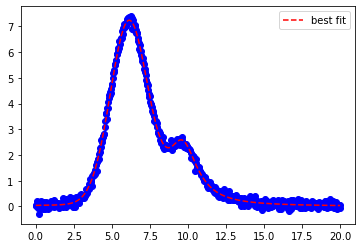

In [13]:
plt.plot(x, data, 'bo')
plt.plot(x, best_fit, 'r--', label='best fit')
plt.legend(loc='best')
plt.show()